## Overview

The King County Housing Data Set provides information about houses in King County, including their size, location, condition, and other features. The objective of this project is to create a multiple regression model that can accurately predict the price of a house.

The project is commissioned by a commercial real estate company interested in purchasing homes within a specific area. Their main concerns revolve around obtaining predicted prices for homes in the area, and assessing any notable disparities between the actual prices and our model's predicted prices.    

## Business Understanding

The client's primary objective is to develop a platform that can offer precise house price estimates which are paramount for both buyers and sellers in King County.

In order to achieve this, we are required to come up with a model that is capable of deducing the main factors that influence the house prices. In order to train the model effectively, the client seeks to utilize accurate and representative data pertaining to the real estate market in King County. This data contains historical sales, current listings, size of the property and other pertinent features.

The model will be able to make precise estimations of a house's value based on its features upon successful training, the model can be seamlessly integrated into the platform, providing buyers and sellers with reliable estimates of house prices. The information drawn from the model will help both buyers and sellers to make well-informed decisions regarding property transactions.

Harnessing the power of technology by delivering a dependable and accurate platform for house buying and selling in King County, the client can establish themselves as a trusted source in the local real estate market which will then in turn attract a dedicated customer base.   

### Problem Statement

Riaor Real Estate faces challenge in effectively entering the dynamic King County real estate market due to the complex interplay of factors influencing housing prices and demand. Understanding the intricate relationship between property features,seasonal trends, and market dynamics is crucial for developing successful market penetration and growth strategies.  

### Objectives:  

1. **Identify key determinants of house prices:**
The goal is to determine which features of a house have the most significant impact on its price in King county.  

2. **Develop a Multiple Regression Model for Predicting House Prices:**   
Create a multiple linear regression model using the identified key determinants to predict the house prices. Evaluate the model's performance using appropriate metrics such as R-squared, RMSE, and MAE.   

3. **Assess Model Accuracy and Disparities:**   
Compare the predicted house prices with the actual prices to identify any notable disparities. Perform residual analysis to understand and address any systematic errors or biases in the model's predictions.  

4. **Provide Insights and Recommendations for Real Estate Decision-Making:**   
Generate actionable insights from the model's results to help the client make informed decisions about buying and selling houses in King County. Highlight the most influential factors and suggest strategies to maximize property value.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error


## Data Loading

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **Date** - house was sold
* **Price** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


## EDA AND DATA CLEANING

In [4]:
df.shape

(21597, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Looking for Null values

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The output indicates the count of missing values (NaN or null values) for each column in the Boston Housing dataset:

    waterfront has 2376 missing values, View has 63 missing values whereas yr_renovated has 3842 missing values

In [8]:

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    
    missing_data= column.isna().sum()                                       
    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")

In [9]:
# percentage of missing data
missing_data(df,df["yr_renovated"])



Percentage of Missing Data: 17.79%


Dropping this will greatly affect our data so instead i will fill the null values with the mode.

In [10]:
# Replacing NaN values in yr_renovated column
df["yr_renovated"].fillna(df["yr_renovated"].mode()[0], inplace= True)
df["yr_renovated"].isna().sum()

0

The year of renovated has many values equited to 0 so i might change it to since it was renovated inorder to get some insights on if renovation may affect the price then drop it

In [11]:
df['age_home'] = 2015 - df['yr_built']

df['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in df['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
df['yrsince_reno'] = df['yrsince_reno'].fillna(df['age_home'])
df.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [12]:
# Fill NaN values in the waterfront column with 'No'
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].isna().sum()

0

In [13]:
df['waterfront'].value_counts()

waterfront
NO     21451
YES      146
Name: count, dtype: int64

In [14]:
df['waterfront'].replace(to_replace=['NO','YES'], value=[0,1], inplace=True)
df['waterfront'].value_counts()

waterfront
0    21451
1      146
Name: count, dtype: int64

In [15]:
#'View' column transformation
df['view'].replace(to_replace=['NONE', 'AVERAGE', 'GOOD', 'FAIR', 'EXCELLENT'], value=[0, 1, 2, 3, 4], inplace=True)

In [16]:
#'Condition' column transformation
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)

In [17]:
#'Grade' column transformation
df['grade'].replace(to_replace=['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], value=[7, 6, 8, 11, 9, 5, 10, 12, 4, 3, 13], inplace=True)

In [18]:
#handling missing values in view columns
df['view'].fillna(df['view'].median(), inplace=True)


#dropped remaining missing values in the yr_renovated and sqft_basement columns
#df.dropna(inplace=True)



#Checking for null values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
age_home         0
yrsince_reno     0
dtype: int64

checking for duplicates

In [19]:
df.duplicated().sum()

0

In [20]:
#conversion of date to dtype datetime to confirm timeframe of dataset
date_df=pd.to_datetime(df["date"])
date_df

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [21]:
# Timestamp of the dataframe
date_df.min(),date_df.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

So our dataset is from data collected between 2014 to 2015 so this tells information of houses sold at that time.

In [22]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

some houses seems like they were sold more than once between the 1 years timeframe 

In [23]:
#checking for how many houses sold more than once 
sold_more_than_once = len(df) - len(df['id'].value_counts())
sold_more_than_once 

177

So there has been 177 homes sold more than once in the period of one year from 2/05/2014 to 27/05/2015

In [24]:
df[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age_home,yrsince_reno
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,98168,47.5045,-122.33,1070,6250,65,65.0
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,98168,47.5045,-122.33,1070,6250,65,65.0
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,0,0.0,...,5,1080,0.0,98168,47.5045,-122.33,1070,6250,65,65.0


change sqft_basement to a numeric

In [25]:
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
(df['sqft_basement'].dtype)

dtype('float64')

In [26]:
median_value= df['sqft_basement'].median()

df["sqft_basement"].replace(np.nan,median_value, inplace=True)
df["sqft_basement"].value_counts()

sqft_basement
0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [27]:
df['sqft_basement'].max()

4820.0

we have most of them at 0.0 which can heavily cause our data simply because the 0 values and the maximum value is 4820 so im going to transform this and investigate later on these and see if which one gives better insight.

In [28]:
df.drop('sqft_basement', axis=1, inplace=True)


In [29]:
# Checking the counts for each value in the column bedrooms
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [30]:


#replace the bedroom with 3 its mode

df["bedrooms"].replace(33,3, inplace=True)
df["bedrooms"].value_counts()

bedrooms
3     9825
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  age_ho

According to out first objective we want to find key determinants of house prices, we want to check which features mostly affect our house price so here we will be focused on the relationship between the features and house prices.

In [32]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age_home', 'yrsince_reno'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS

In [33]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,age_home,yrsince_reno
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.195907,3.409825,7.657915,1788.596842,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,44.000324,42.054869
std,2.876736e+09,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.687319,0.650546,1.173200,827.759761,53.513072,0.138552,0.140724,685.230472,27274.441950,29.375234,28.945393
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,18.000000,16.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,40.000000,38.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000,61.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,115.000000


##### Price(target variable)   
High standard deviation indicates a wide range of house prices.   
The median (50% percentile) is lower than the mean, suggesting potential positive skewness (a long tail to the right), which is common in house price data.  
so i might consider log transforming it for a better model  
below lets check relationships between these features and the target variable.

In [34]:
df['price_log'] = np.log1p(df['price'])

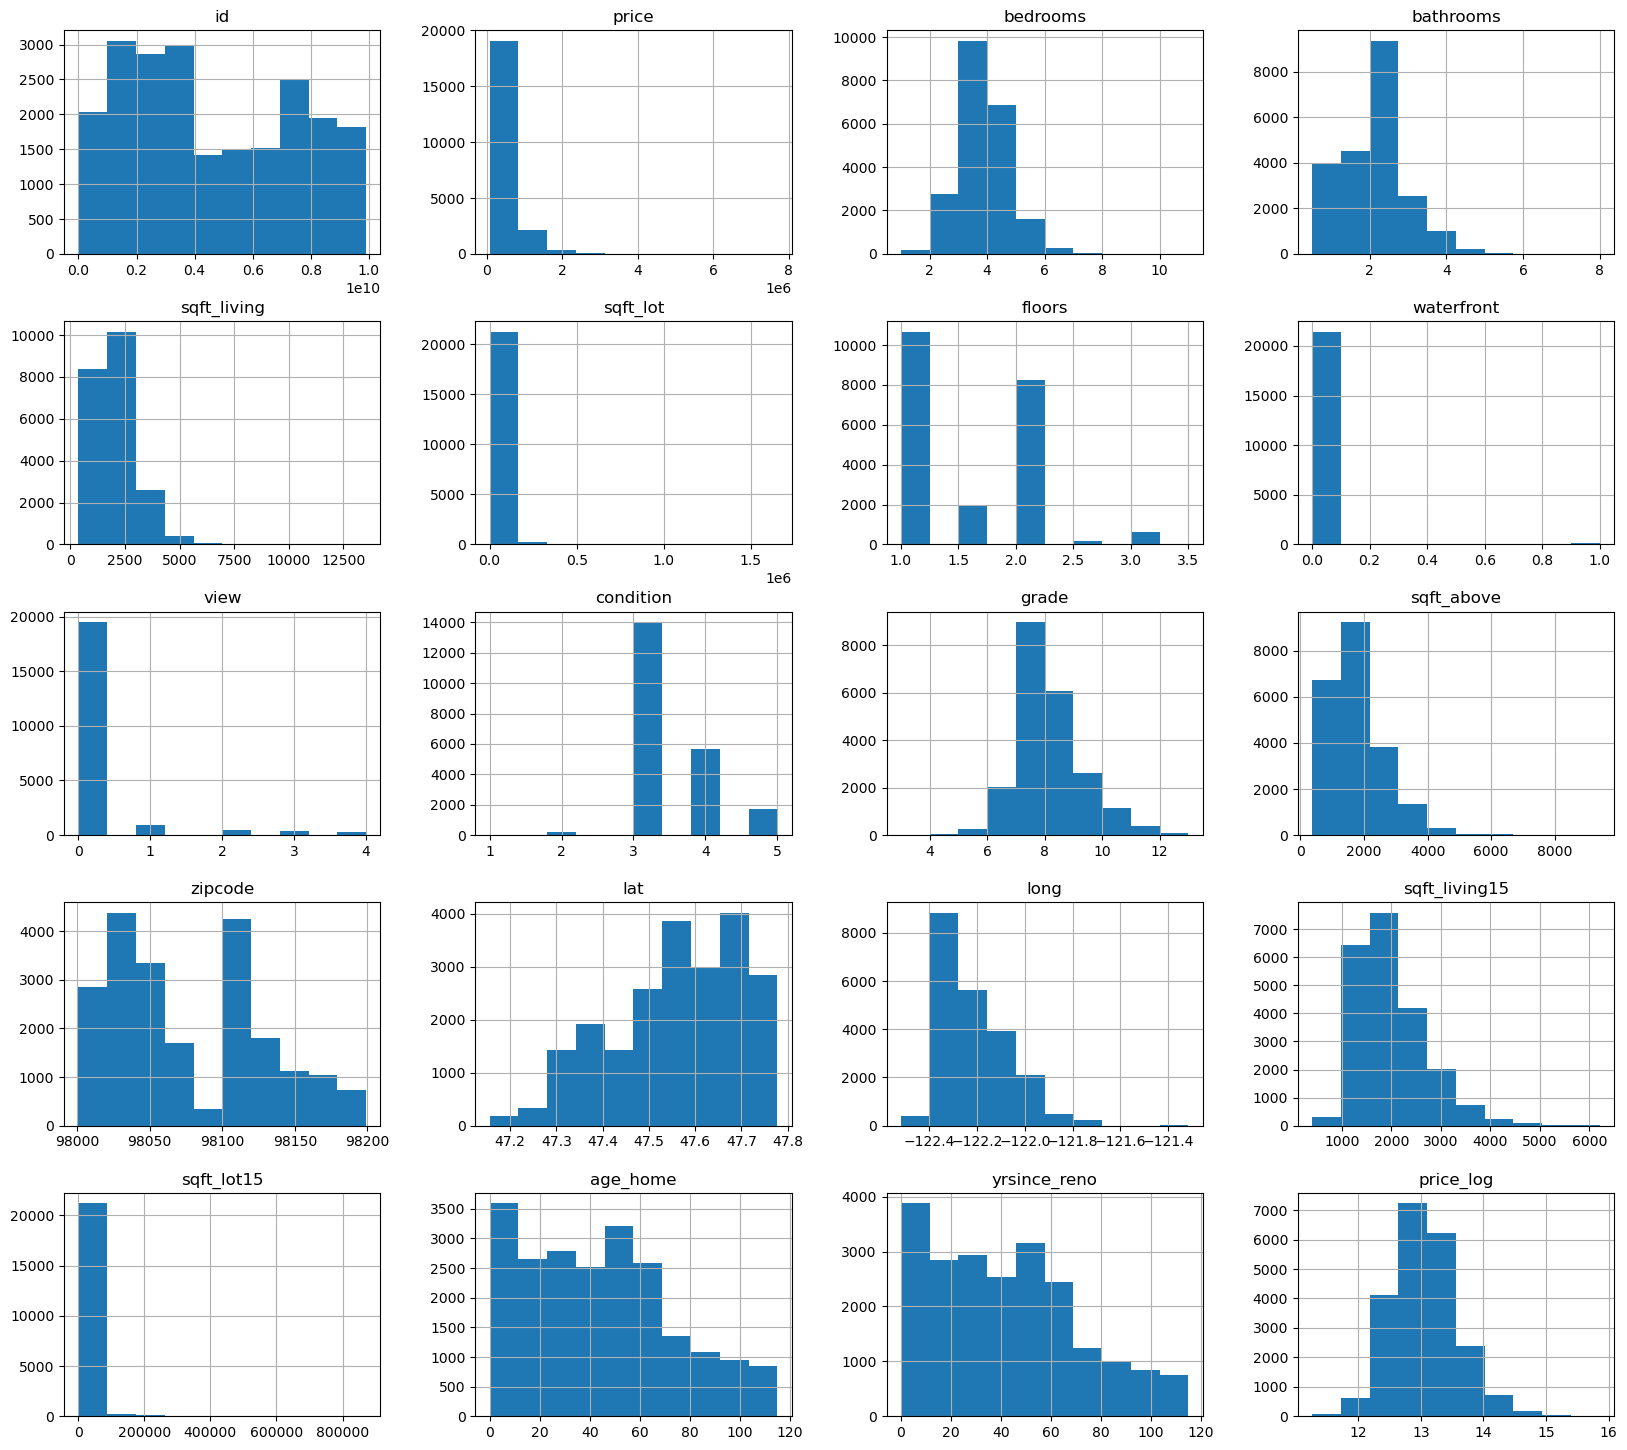

In [35]:
df.hist(figsize = (20,18));

In [36]:
# Splitting the columns based on variable types
categorical_columns = []
numerical_columns = []
for i in df.columns:
    if df[i].dtype == 'O':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
        
print(f"Categorical columns:",  categorical_columns) 
print(f"Numerical columns:",  numerical_columns) 

Categorical columns: ['date']
Numerical columns: ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_home', 'yrsince_reno', 'price_log']


#### Observations from the Histograms  

**1. Skewness:** Many features exhibit positive skewness, meaning there are a few extremely high values pulling the tail to the right. Examples include price, sqft_living, sqft_lot, etc.  

**2. Outliers:** Some features, such as price, sqft_living, and sqft_lot, might contain outliers which are data points that deviate significantly from the overall pattern.  

**3. Multimodality:** Some features, like zipcode, might exhibit multimodality, indicating multiple clusters or groups within the data.   

**4. Range:** The range of values for each feature varies significantly. Some features have a wide range (e.g., price, sqft_living), while others have a narrower range (e.g., floors, waterfront).

considering these observations 
Before proceeding with the most affecting features we have to handle the outliers first  inorder to know what to do with them before proceeding.  


#### Check for outliers

IndexError: index 5 is out of bounds for axis 0 with size 5

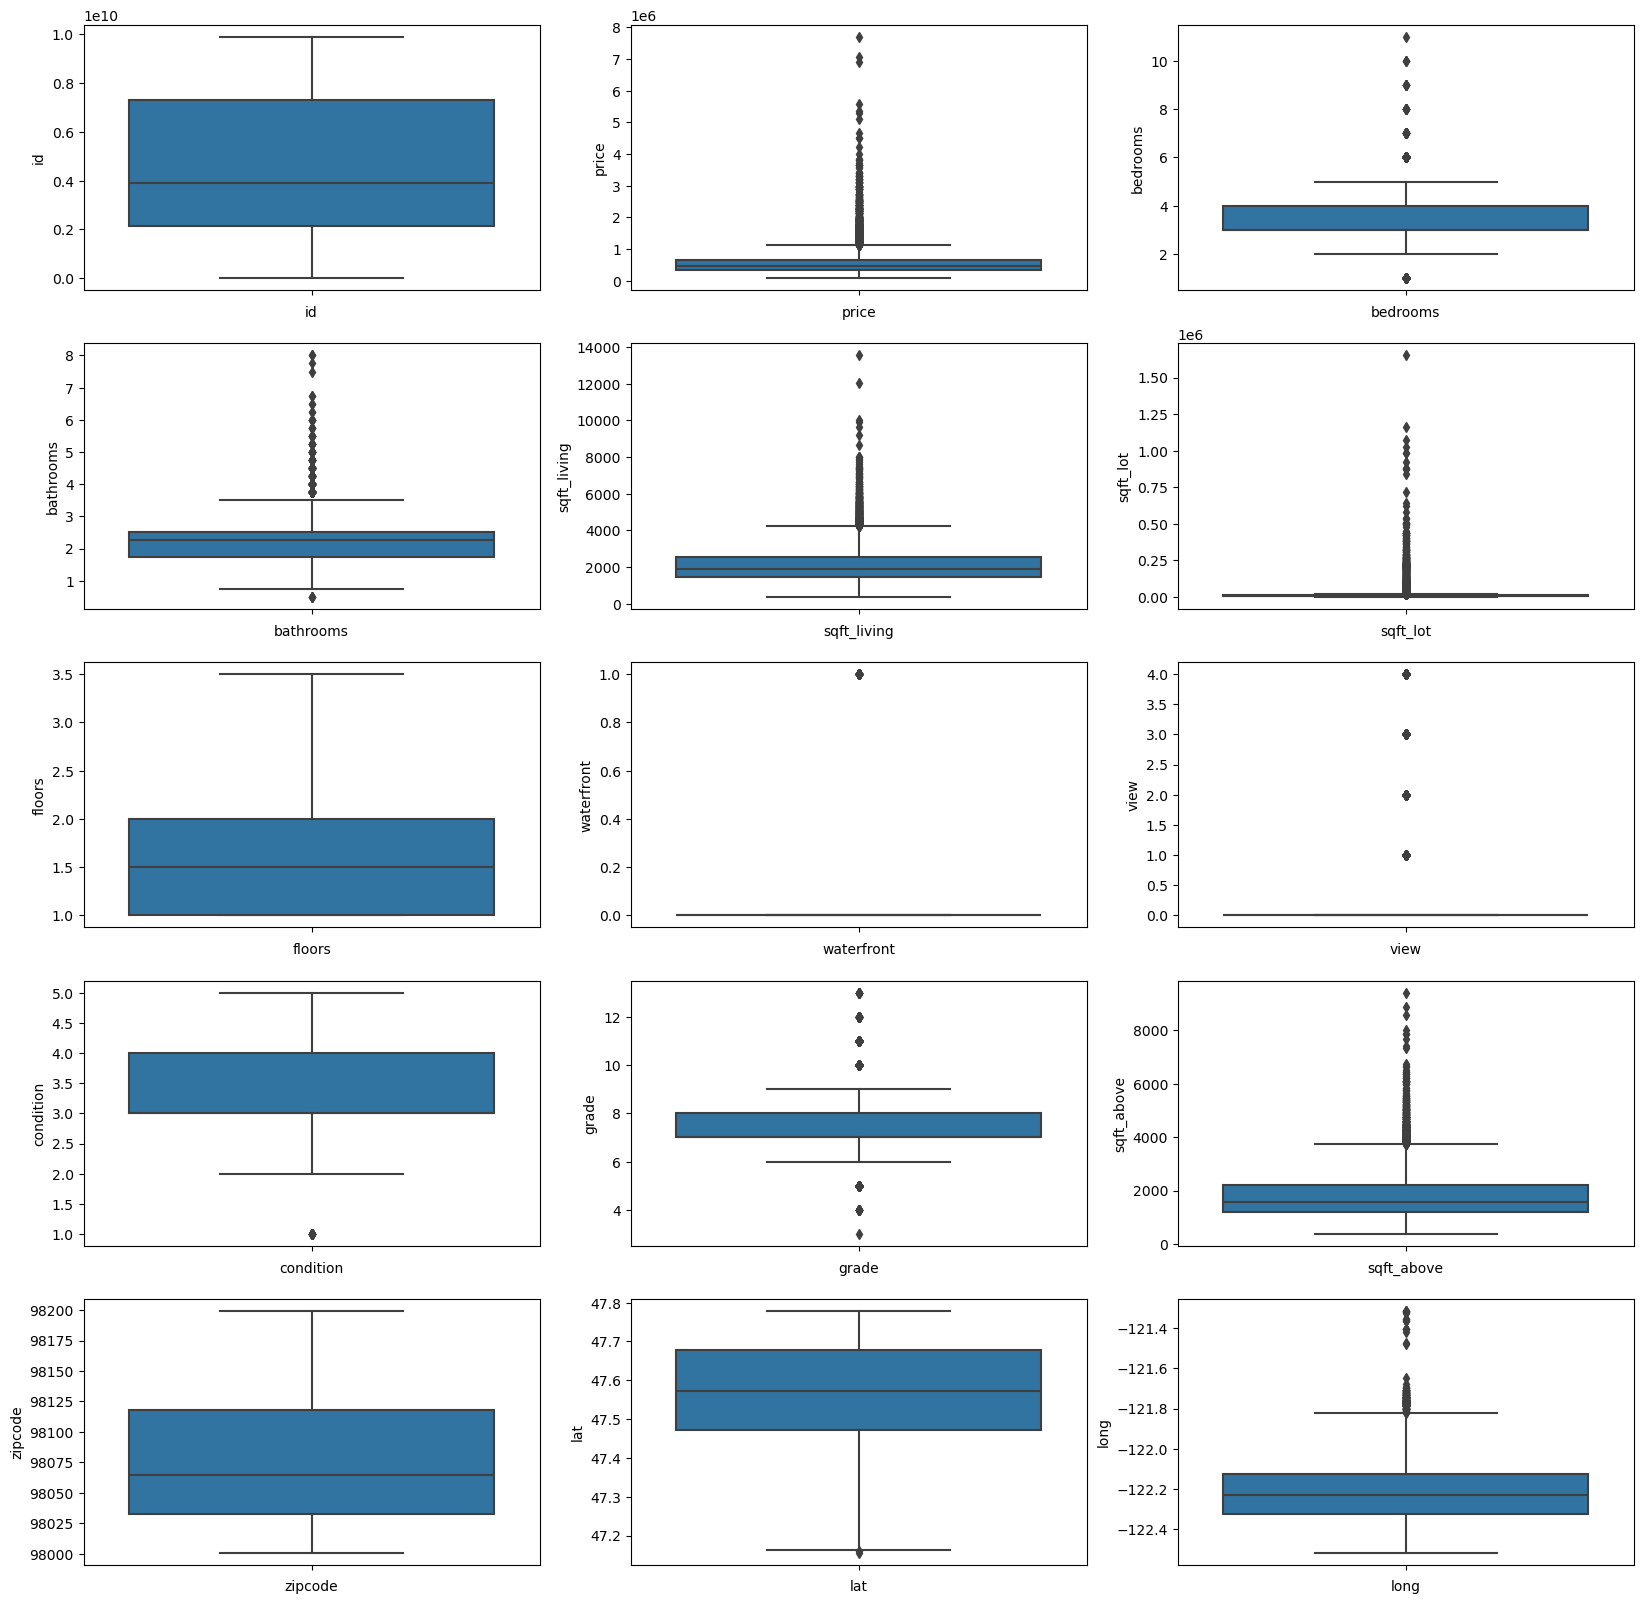

In [37]:
# Box Plot to investigate the price column
# Outlier Analysis for numeric variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,20))

# Iterate over the columns and create the box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_xlabel(column)  

plt.tight_layout()
plt.show()
# From the boxplots below it can be seen that there are a lot of outliers.

**Price:** A significant number of outliers, indicating exceptionally high-priced houses.   
**Bedrooms:** A few potential outliers with extremely high bedroom counts.
**Sqft_living and sqft_lot:** Multiple outliers, suggesting unusually large houses.  
**Waterfront:** Potential outliers, possibly indicating properties with unique waterfront characteristics.   
**View:** Some outliers, suggesting properties with exceptionally good views.   
**Grade:** A few potential outliers representing exceptionally high-grade properties.  
**Sqft_above and sqft_basement:** Some outliers, indicating unusually large above-ground or basement areas.  

but considering this is based on real data we will avoid removing outliers as it will not give accurate insight to the dataset

Correlation analysis

<Axes: >

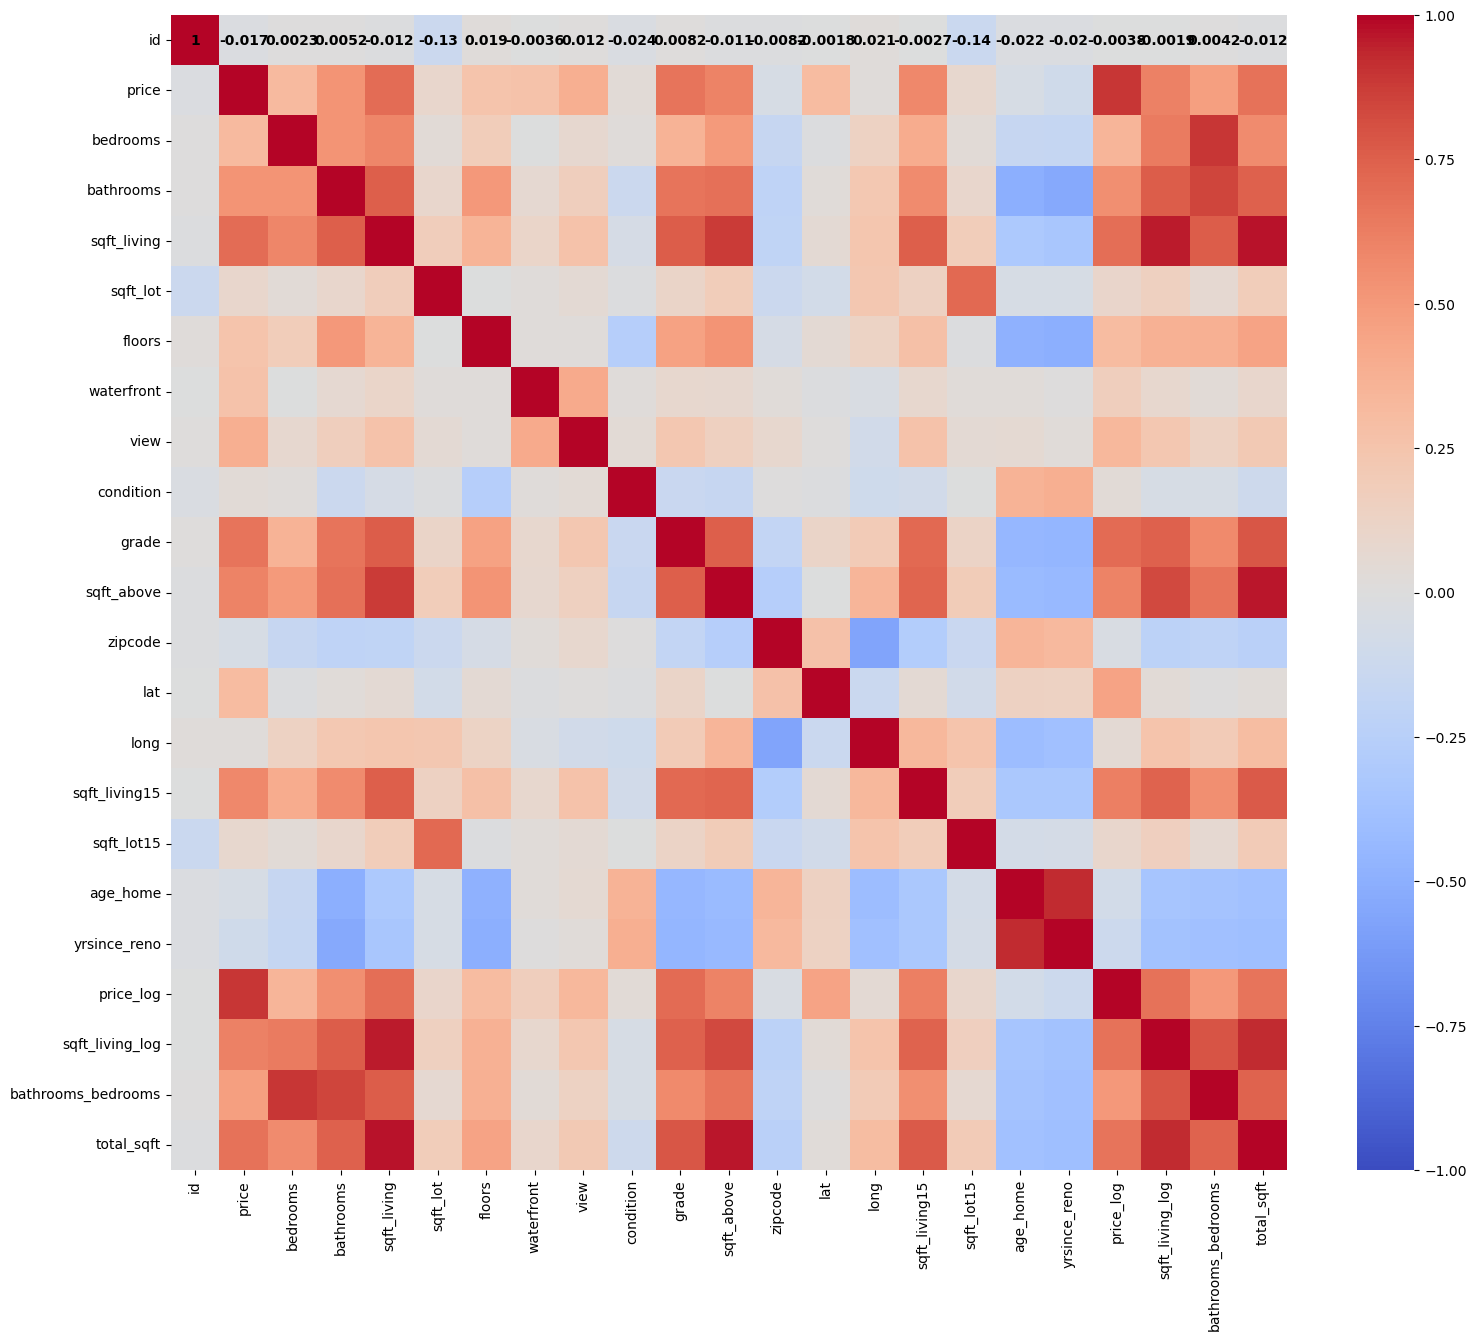

In [141]:
# Example covariance matrix; replace this with your actual covariance matrix
corr = df.corr()

# Plotting the covariance matrix on a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr, 
            center=0, 
            annot=True,  # Show numbers inside the heatmap boxes
            annot_kws={"size": 10, "weight": 'bold', "color": 'black'},  # Adjust annotation properties
            cmap='coolwarm',  # Coolwarm color map
            vmin=-1, vmax=1, ) # Set limits for the color scale

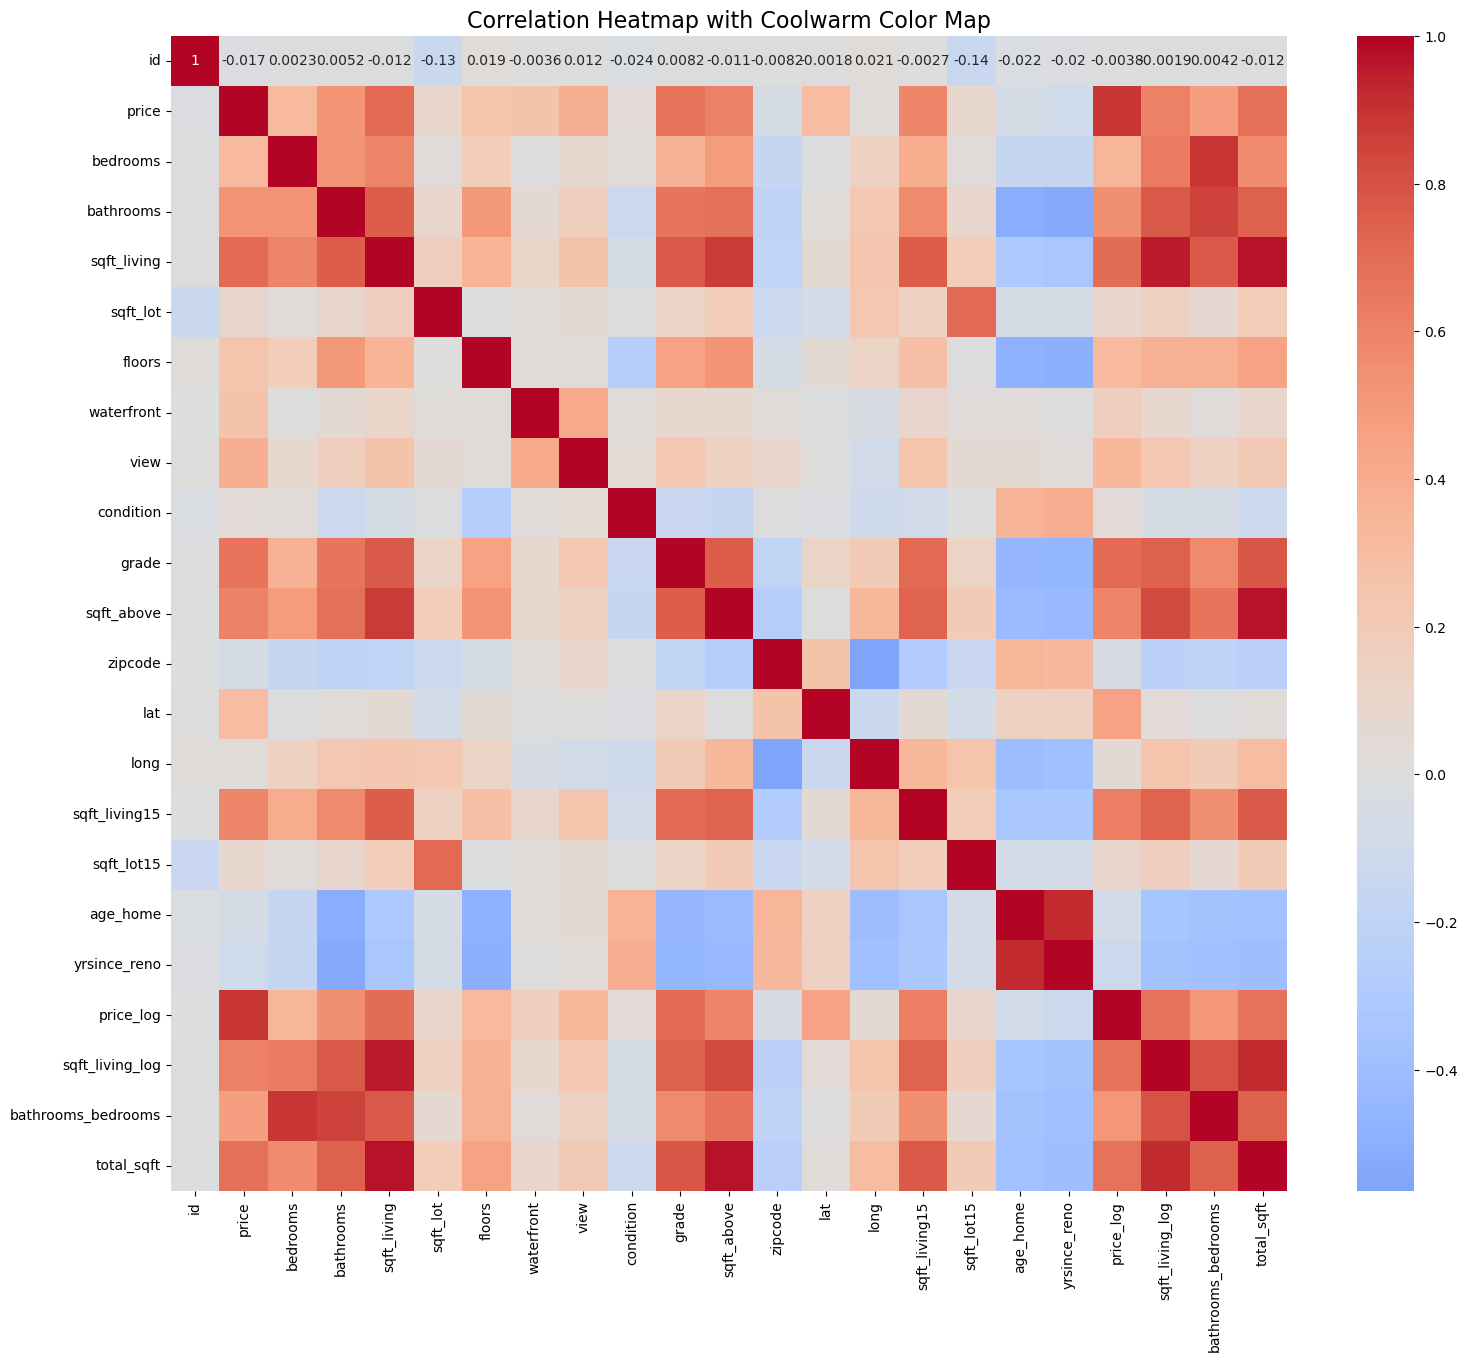

In [139]:
correlation = df.corr()
#plotting the covariance matrix on a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(corr, center=0, annot=True, cmap='coolwarm');  # Added 'cmap' argument for coolwarm color map
plt.title('Correlation Heatmap with Coolwarm Color Map', fontsize=16)
plt.show()

In [39]:
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

price            1.000000
price_log        0.891745
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.386430
bedrooms         0.315954
lat              0.306692
waterfront       0.264306
floors           0.256804
sqft_lot         0.089876
sqft_lot15       0.082845
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
age_home        -0.053953
yrsince_reno    -0.097541
Name: price, dtype: float64


In [40]:
price_correlations = correlation_matrix['price_log'].sort_values(ascending=False)
print(price_correlations)

price_log        1.000000
price            0.891745
grade            0.703720
sqft_living      0.695185
sqft_living15    0.619326
sqft_above       0.601579
bathrooms        0.551249
lat              0.448837
bedrooms         0.350855
view             0.332737
floors           0.310630
waterfront       0.170720
sqft_lot         0.100025
sqft_lot15       0.092281
long             0.050862
condition        0.038918
id              -0.003751
zipcode         -0.038788
age_home        -0.080583
yrsince_reno    -0.122026
Name: price_log, dtype: float64


c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


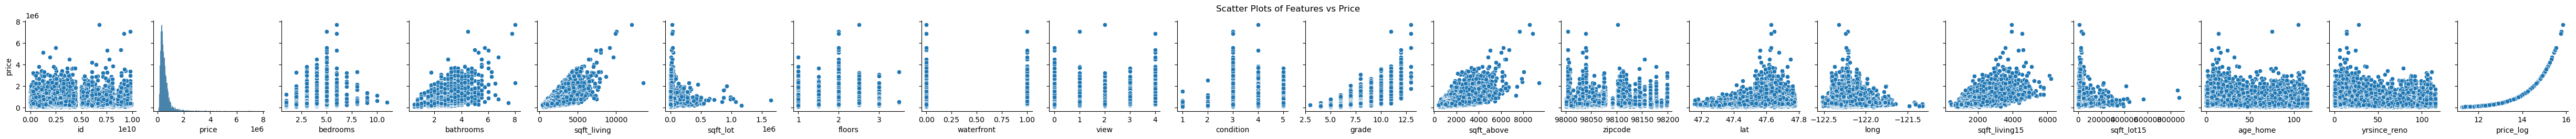

In [41]:
df_subset = df[numerical_columns]
df_subset.drop('price', axis=1)
# Plot a pair plot for the selected columns
sns.pairplot(df_subset, y_vars=['price'], x_vars=numerical_columns)
plt.suptitle('Scatter Plots of Features vs Price', y=1.02)
plt.show()


### Feature selection

In [77]:



df['sqft_living_log'] = np.log1p(df['sqft_living'])
df['bathrooms_bedrooms'] = df['bathrooms'] + df['bedrooms']
df['total_sqft'] = df['sqft_living'] + df['sqft_above']

In [93]:
df_selected = df[['sqft_living','sqft_above','grade','bathrooms_bedrooms','price_log']]
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sqft_living         21597 non-null  int64  
 1   sqft_above          21597 non-null  int64  
 2   grade               21597 non-null  int64  
 3   bathrooms_bedrooms  21597 non-null  float64
 4   price_log           21597 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 843.8 KB


In [100]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age_home', 'yrsince_reno', 'price_log', 'sqft_living_log',
       'bathrooms_bedrooms', 'total_sqft'],
      dtype='object')

In [92]:
df_selected2 = df[['sqft_living','sqft_above','grade','bathrooms_bedrooms','price_log','view']]

In [94]:
df_selected3 = df[['sqft_living','sqft_above','grade','bathrooms_bedrooms','price_log','view','condition']]

In [95]:
df_selected4 = df[['sqft_living','sqft_above','grade','bathrooms_bedrooms','price_log','view','condition','waterfront']]

In [101]:
df_selected5 = df[['sqft_living','sqft_above','grade','bathrooms_bedrooms','price_log','view','condition','waterfront','yrsince_reno']]

In [102]:
df_selected6 = df[['sqft_living','sqft_above','grade','bathrooms_bedrooms','price_log','view','condition','waterfront','floors']]

In [115]:
df_selected7 = df[['sqft_living','sqft_above','grade','price_log','view','condition','waterfront']]

In [104]:
df_selected8 = df[['sqft_living','grade','price_log','view','condition']]

In [105]:
df_selected9 = df[['sqft_living','grade','price_log','view','condition','waterfront']]

In [108]:
df_selected10 = df[['sqft_living','grade','price_log','lat','long']]

In [109]:
df_selected11 = df[['sqft_living','grade','age_home','price_log']]

In [111]:
df_selected12 = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','price_log' ,'floors', 'waterfront', 'condition', 'grade']]

In [122]:
df_selected13 =df[['sqft_living','grade','age_home','price_log','lat','long']]

In [123]:
df_selected14 = df[['sqft_living','age_home','price_log']]

In [125]:
df_selected15 = df[['zipcode','price_log']]

In [126]:
df_selected16 = df[['age_home','price_log','view','condition']]

In [127]:
df_selected17 = df[['waterfront','view','price_log','condition','grade','age_home']]

In [133]:
df_selected18 = df[['sqft_living','grade','price_log','age_home','lat','long']]

In [124]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'age_home', 'yrsince_reno', 'price_log', 'sqft_living_log',
       'bathrooms_bedrooms', 'total_sqft'],
      dtype='object')

Based on the correlation coefficients with price and price_log from the  dataset, the most important features are:   

**sqft_living** - square footage of the home  
        Justification: A strong positive correlation with price, (0.695185). indicating that larger houses tend to be more expensive.

**sqft_above** -  square footage of house apart from basement
        Justification: A significant positive correlation,( 0.601579). implying that the size of the above-ground living area impacts price

**grade** - overall grade given to the housing unit, based on King County grading system
        Justification: A high correlation (0.703720). suggesting that higher-graded houses command higher prices.

**bathrooms** - Number of bathrooms/bedrooms
        Justification: A moderate positive correlation, (0.551249). indicating that more bathrooms tend to increase the property value.  
    
**bedroooms** - Number of bedrooms/house
        Justification: A moderate  correlation, (0.350855). i might merge this with bathroom.  

**sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
        Justification: A positive correlation, (0.619326). that houses with larger square footage tend to be surrounded by other houses with larger square footage, But I will go with sqft_living.  
#### might consider in my model to check the behaviour of my model   
**waterfront** - House which has a view to a waterfront
        Justification: A Low correlation (0.17). suggesting that waterfront properties command higher prices 

### Question 1. **Identify key determinants of house prices:**
The goal is to determine which features of a house have the most significant impact on its price in King county.

    **Answer:** sqft_living, sqft_above, grade, bathrooms, bedrooms are the most important features. These features have a strong positive correlation with price, indicating that larger houses tend to be more expensive. sqft_living15 is also a significant feature, but it is calculated on the nearest 15 neighbors, which might not be as relevant to the overall property value as the other features.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

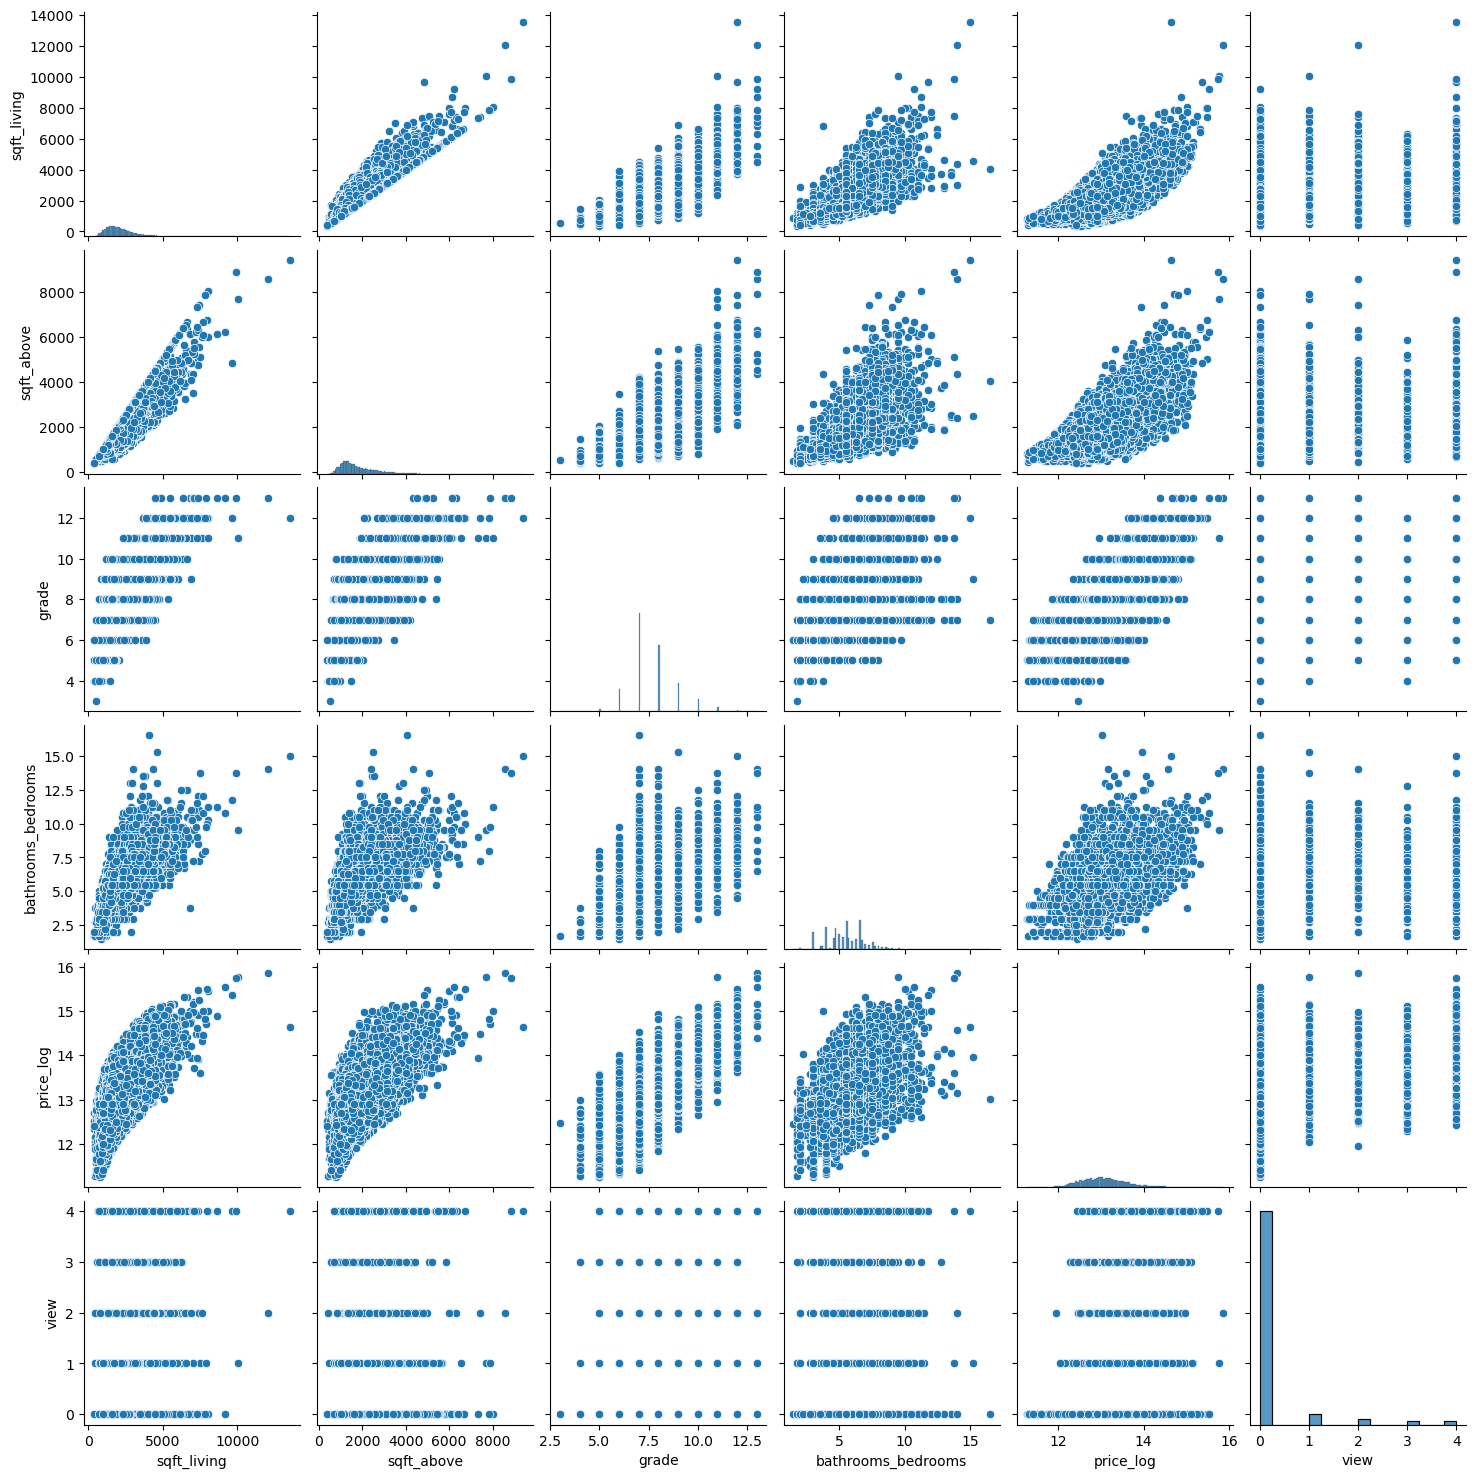

In [85]:
sns.pairplot(data=df_selected)

In [86]:

from statsmodels.stats.outliers_influence import variance_inflation_factor


X = df_selected  # Independent variables

# Function to calculate VIF
def calculate_vif(X):
  vif = pd.DataFrame()
  vif["feature"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return vif

# Calculate VIF for your dataset
vif_data = calculate_vif(X)
print(vif_data)


              feature         VIF
0         sqft_living   39.281844
1          sqft_above   27.855598
2               grade  130.672090
3  bathrooms_bedrooms   36.015214
4           price_log   95.920159
5                view    1.216560


#### VIF Analysis
    sqft_living (VIF: 36.39) and sqft_above (VIF: 26.93): These features are likely highly correlated with each other, as they both measure the size of the living space.
    grade (VIF: 140.04): This feature has an extremely high VIF, indicating strong multicollinearity with other features.
    bathrooms (VIF: 21.74) and bedrooms (VIF: 23.89): These features also show high VIF values, suggesting they are correlated with other features like sqft_living and grade.
    price_log (VIF: 105.00): This suggests that the target variable, price_log, is highly correlated with some of the predictors, which is expected.

Since `sqft_living` and `sqft_above` are both measures of the house size, you can consider keeping only one of them 

In [87]:
df_selected.drop('sqft_above', axis=1, inplace=True)
df_selected.columns

C:\Users\user\AppData\Local\Temp\ipykernel_8584\1383752437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.drop('sqft_above', axis=1, inplace=True)


Index(['sqft_living', 'grade', 'bathrooms_bedrooms', 'price_log', 'view'], dtype='object')

#### QUESTION 2. **Develop a Multiple Regression Model for Predicting House Prices:**   
Create a multiple linear regression model using the identified key determinants to predict the house prices. Evaluate the model's performance using appropriate metrics such as R-squared, RMSE, and MAE.

In [96]:

def linear_regression_model(X, y, test_size=0.2, random_state=42):
 

  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

  # Scale features
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)

  # Create and train the model
  model = LinearRegression()
  model.fit(X_train_scaled, y_train)

  # Make predictions
  y_pred = model.predict(X_test_scaled)

  # Evaluate the model
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  print('model:',model,'mse:', mse, 'mae:',mae, 'r2:',r2)


In [89]:
X = df_selected.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11586708184262431 mae: 0.2758790913735769 r2: 0.5745669624815544


### model 2

In [97]:
X2 = df_selected2.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X2, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11498659144401316 mae: 0.2735514288632052 r2: 0.5777998885104998


### model 3

In [98]:
X3 = df_selected3.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X3, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11224905570990878 mae: 0.27032592929521904 r2: 0.5878513899736779


### Model 4

In [99]:
X4 = df_selected4.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X4, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11203688556100896 mae: 0.26996090771264586 r2: 0.5886304222016561


### Model 5

In [112]:
X5 = df_selected5.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X5, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.10558842484303152 mae: 0.2599330483992336 r2: 0.6123074509741051


### Model 6

In [113]:
X6 = df_selected6.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X6, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11164084517288785 mae: 0.2691309580540234 r2: 0.5900845769332579


### Model 7

In [116]:
X7 = df_selected7.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X7, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11210765894454348 mae: 0.27003548850436254 r2: 0.5883705612035735


### Model 8

In [117]:
X8= df_selected8.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X8, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11270311297694652 mae: 0.27171202734628747 r2: 0.5861842127284138


### Model 9

In [118]:
X9 = df_selected9.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X9, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11250260173592858 mae: 0.2714680044988713 r2: 0.5869204365545969


### Model 10

In [119]:
X10 = df_selected10.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X10, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.08020517096060717 mae: 0.21937348504631168 r2: 0.7055079927463503


### Model 11

In [120]:
X11 = df_selected11.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X11, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.10659690618315151 mae: 0.26175081227361124 r2: 0.6086045763268376


### Model 12

In [121]:
X12 = df_selected12.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X12, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11617663701797695 mae: 0.2754770316075112 r2: 0.5734303583966367


### Model 13

In [128]:
X13 = df_selected13.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X13, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.07474678718413091 mae: 0.2109480508426394 r2: 0.7255497229171488


### Model 14

In [129]:
X14 = df_selected14.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X14, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.13671999706878746 mae: 0.29907198780815825 r2: 0.4980006165902261


### Model 15

In [130]:
X15 = df_selected15.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X15, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.2716397567106612 mae: 0.41148241248702533 r2: 0.002611225117821525


### Model 16

In [131]:
X16 = df_selected16.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X16, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.24060342263214174 mae: 0.3929225578593323 r2: 0.11656837041294399


### Model 17

In [132]:
X17 = df_selected17.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X17, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.11455359529202391 mae: 0.2689673798195419 r2: 0.5793897349556255


### Model   18

In [140]:
X18 = df_selected18.drop('price_log',axis=1)
y = df_selected['price_log']
linear_regression_model(X18, y, test_size=0.2, random_state=42)

model: LinearRegression() mse: 0.07474678718413091 mae: 0.2109480508426394 r2: 0.7255497229171488


Moderate Fit:

An R-squared value of 0.5527 indicates a moderate level of explanatory power. This suggests that your model is capturing some, but not all, of the important factors influencing house prices. It's common in real estate data where many factors can influence prices.
Error Magnitude:

The MAE of 0.2823 provides a clear understanding of the average prediction error. Given that MAE is in the same units as your target variable (log-transformed house prices), you can interpret this as the average deviation of your predictions from the actual values.

In [51]:
import statsmodels.api as sm

# Define the predictors and target variable
X = df_selected.drop('price_log', axis=1)
y = df_selected['price_log']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6771.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        14:59:52   Log-Likelihood:                -8014.4
No. Observations:               21597   AIC:                         1.604e+04
Df Residuals:                   21592   BIC:                         1.608e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          11.2383      0.021    526.627      

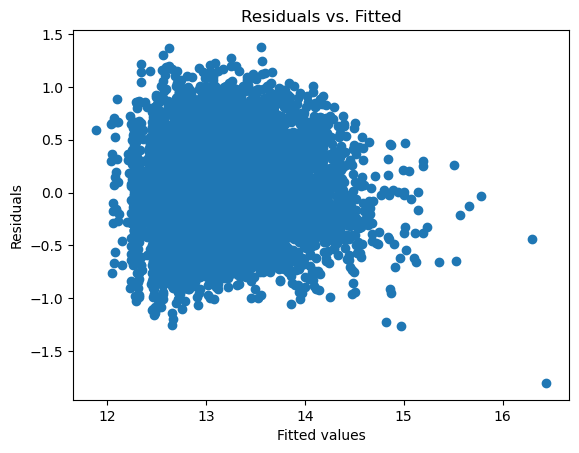

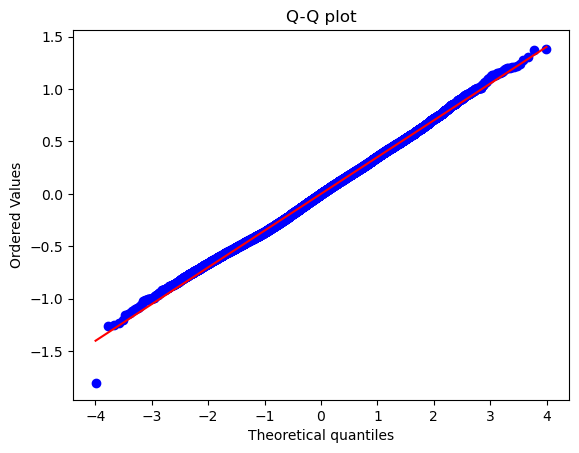

In [52]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Residuals vs. Fitted
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.show()

# Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()


1. Create a New Model with Refined Features

In [53]:
import statsmodels.api as sm
from statsmodels.tools import add_constant
from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Select significant features based on previous model's summary
significant_indices = [0, 1, 2, 3, 4, 6, 8]  # Example indices based on summary
X_poly_selected = X_poly[:, significant_indices]

# Add constant to the selected features
X_poly_selected_const = add_constant(X_poly_selected)

# Fit the model with selected polynomial features
model_poly_refined = sm.OLS(y, X_poly_selected_const).fit()

# Print summary of the refined model
print(model_poly_refined.summary())


                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6771.
Date:                Mon, 15 Jul 2024   Prob (F-statistic):               0.00
Time:                        15:02:42   Log-Likelihood:                -8014.4
No. Observations:               21597   AIC:                         1.604e+04
Df Residuals:                   21592   BIC:                         1.608e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.2383      0.021    526.627      0.0

2. Check for Multicollinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for the selected features
vif_data = pd.DataFrame()
vif_data["Feature"] = [poly.get_feature_names_out(X.columns)[i] for i in significant_indices]
vif_data["VIF"] = [variance_inflation_factor(X_poly_selected, i) for i in range(X_poly_selected.shape[1])]

print(vif_data)


             Feature        VIF
0              const  79.953373
1        sqft_living        inf
2              grade   2.612062
3          bathrooms        inf
4           bedrooms   1.647758
5  const sqft_living        inf
6    const bathrooms        inf


c:\Users\user\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


3. Apply Regularization

In [56]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score


# Fit Ridge regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_poly_selected, y)
ridge_scores = cross_val_score(ridge, X_poly_selected, y, cv=5, scoring='neg_mean_squared_error')

# Fit Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_poly_selected, y)
lasso_scores = cross_val_score(lasso, X_poly_selected, y, cv=5, scoring='neg_mean_squared_error')

print("Ridge Regression CV MSE:", np.mean(-ridge_scores))
print("Lasso Regression CV MSE:", np.mean(-lasso_scores))


Ridge Regression CV MSE: 0.12305141770505428
Lasso Regression CV MSE: 0.14085332291121083


4. Evaluate the New Model

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions
y_pred = model_poly_refined.predict(X_poly_selected_const)

# Evaluation metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)


MSE: 0.1229844341632547
MAE: 0.28258466890967854
R-squared: 0.5564066733118234


The mae and mse are quite well but we want to increase the R-squared, we can add new features in our model to see if it can increase the R-squared

### QUESTION 3 **Assess Model Accuracy and Disparities:**   
Compare the predicted house prices with the actual prices to identify any notable disparities. Perform residual analysis to understand and address any systematic errors or biases in the model's predictions. 

#### Implementation  

1. Plot Predicted vs. Actual Prices

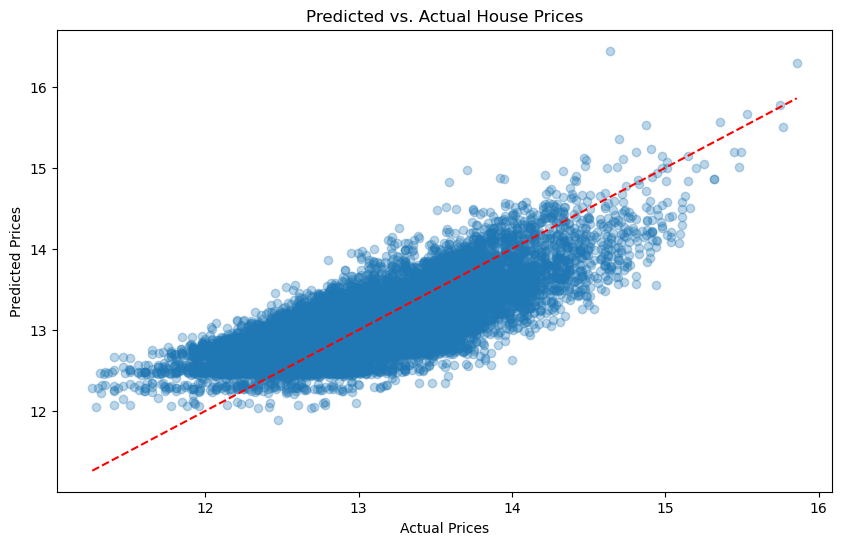

In [58]:


# Predictions
y_pred = model_poly_refined.predict(X_poly_selected_const)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.3)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual House Prices')
plt.show()


2. Residual analysis

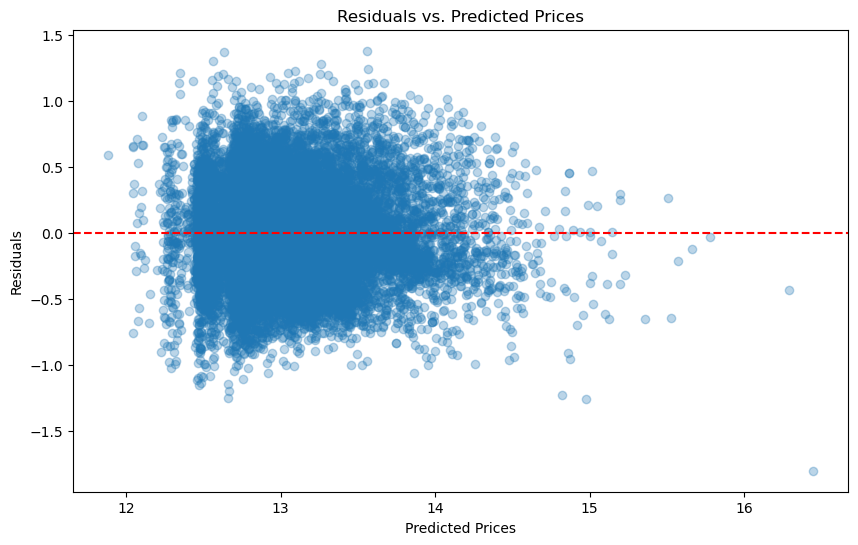

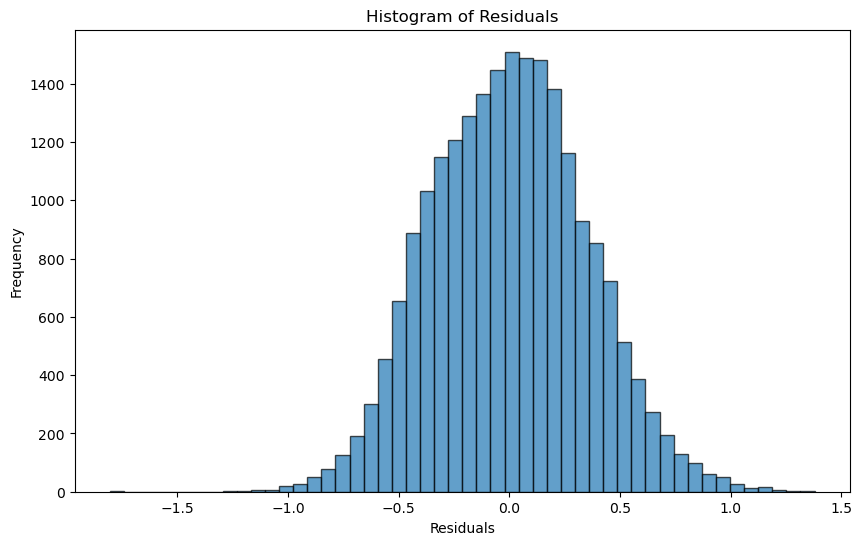

In [59]:
# Residuals
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()
